In [1]:
import numpy as np
import matplotlib.pyplot as plt
fontsize_label = 30
fontsize_title = 30
fontsize_tick = 28
fontfamily = 'Arial'
axiswidth = 3
linewidth = 3
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Morphology A

## Trj plot, hb&qvalue vs time

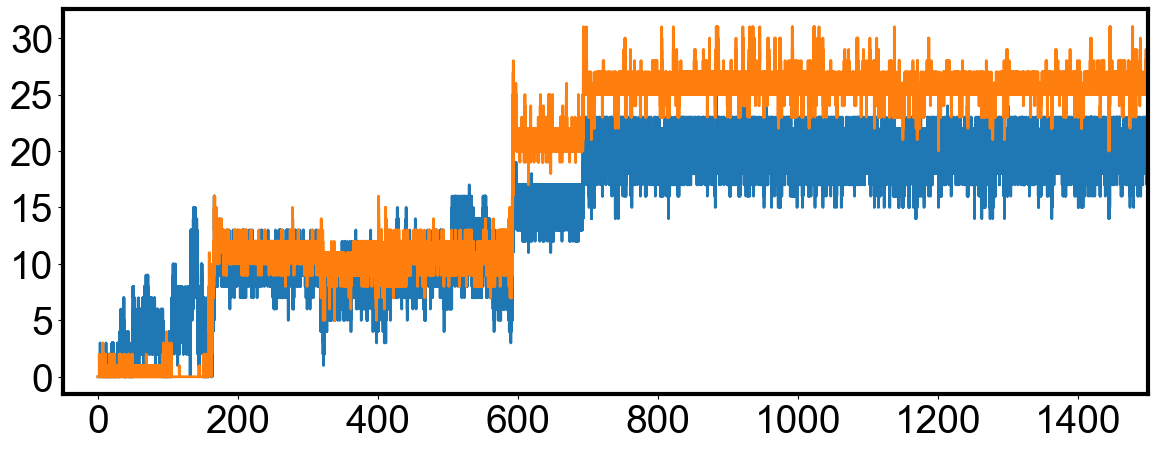

In [2]:
frame = 3
last_f = 4000
hb = np.loadtxt(f'./abeta_selfseeding/morphology_a/time-evo-data/{frame}.hb')[:-last_f]
qv = np.loadtxt(f'./abeta_selfseeding/morphology_a/time-evo-data/{frame}.qvalue')[:-last_f]
plt.figure(figsize=(14, 5))
ax = plt.axes()

time = np.arange(len(hb))*0.005
plt.plot(time,hb,label='H-bond',linewidth=linewidth-1)
plt.plot(time,qv,label='Q-value',linewidth=linewidth-1)
plt.xlim(-50,1500)
for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

plt.savefig('./abeta_selfseeding/morphology_a/traj_hb_qvalue_vs_time.png',dpi=220,transparent=True)


## PMF of hb vs qvalue

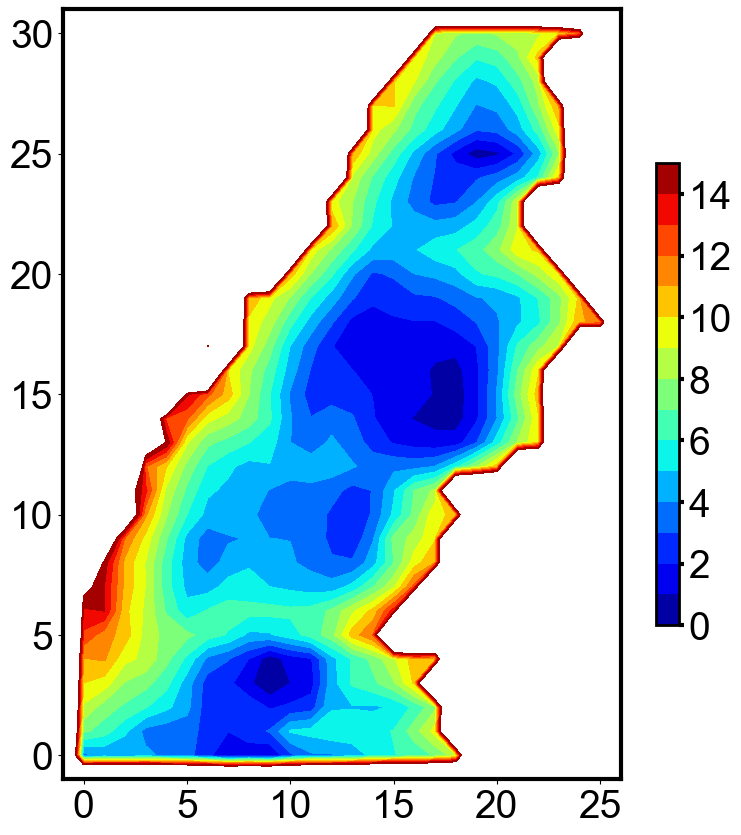

In [3]:
plt.figure(figsize=(9, 10))
ax = plt.axes()
pmf_raw = np.loadtxt('./abeta_selfseeding/morphology_a/pmf2d_hb_qvalue_300.dat')[:,2].reshape(26,31)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
pmf = np.pad(pmf_raw,(1,1),constant_values=32)
levels = np.arange(16)
qv,hb = np.meshgrid(np.arange(-1,32),np.arange(-1,27))
heatmap = plt.contourf(hb,qv,pmf,cmap='jet',levels=levels)

for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

plt.savefig('./abeta_selfseeding/morphology_a/pmf_hb_vs_qvalue.png',dpi=220,transparent=True)

## PMF of Interpeptide HB vs intra HB

[Text(1, 0.0, '0'),
 Text(1, 2.0, '2'),
 Text(1, 4.0, '4'),
 Text(1, 6.0, '6'),
 Text(1, 8.0, '8'),
 Text(1, 10.0, '10')]

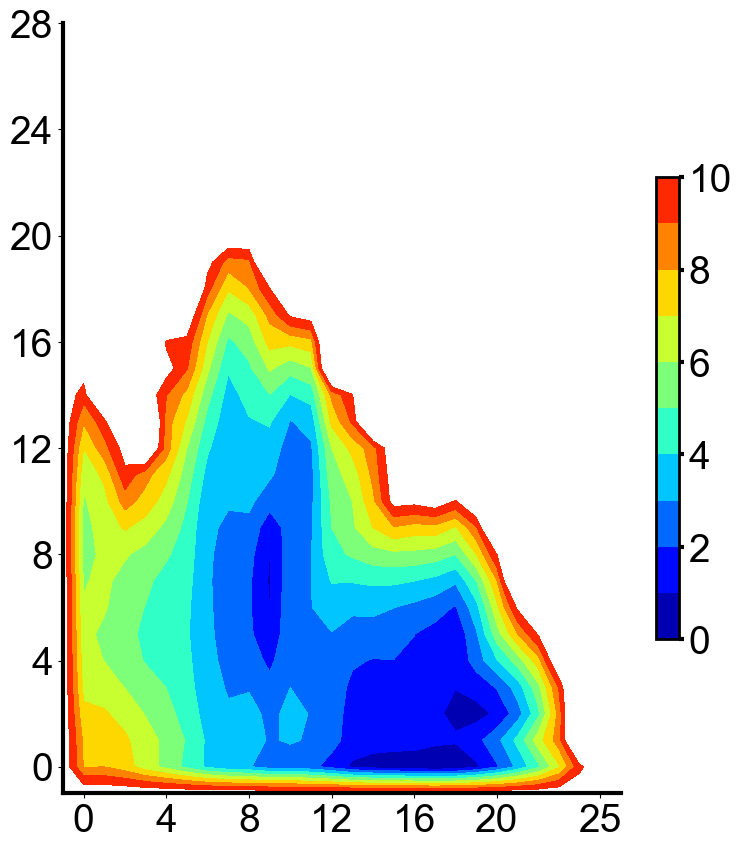

In [4]:
plt.figure(figsize=(9, 10))
ax = plt.axes()
pmf_raw = np.loadtxt('./abeta_selfseeding/morphology_a/pmf2d_hb_inhb_300.dat')[:,2].reshape(26,21)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
vmax = 11#int(pmf_raw.max())+1
print()
pmf = np.pad(pmf_raw,(1,1),constant_values=vmax)

levels = np.arange(vmax)
inhb,hb = np.meshgrid(np.arange(-1,22),np.arange(-1,27))

heatmap = plt.contourf(hb,inhb,pmf,cmap='jet',vmin=0,vmax=vmax,levels=levels)

plt.xticks([0,4,8,12,16,20,25],fontsize=fontsize_tick,family=fontfamily)
plt.yticks([0,4,8,12,16,20,24,28],fontsize=fontsize_tick,family=fontfamily)
ax.spines[['right', 'top']].set_visible(False)

for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)

    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

## PMF of inter/intra Hbond comparison

11.0
13.959627414151436


[Text(1, 0.0, '0'),
 Text(1, 2.0, '2'),
 Text(1, 4.0, '4'),
 Text(1, 6.0, '6'),
 Text(1, 8.0, '8'),
 Text(1, 10.0, '10')]

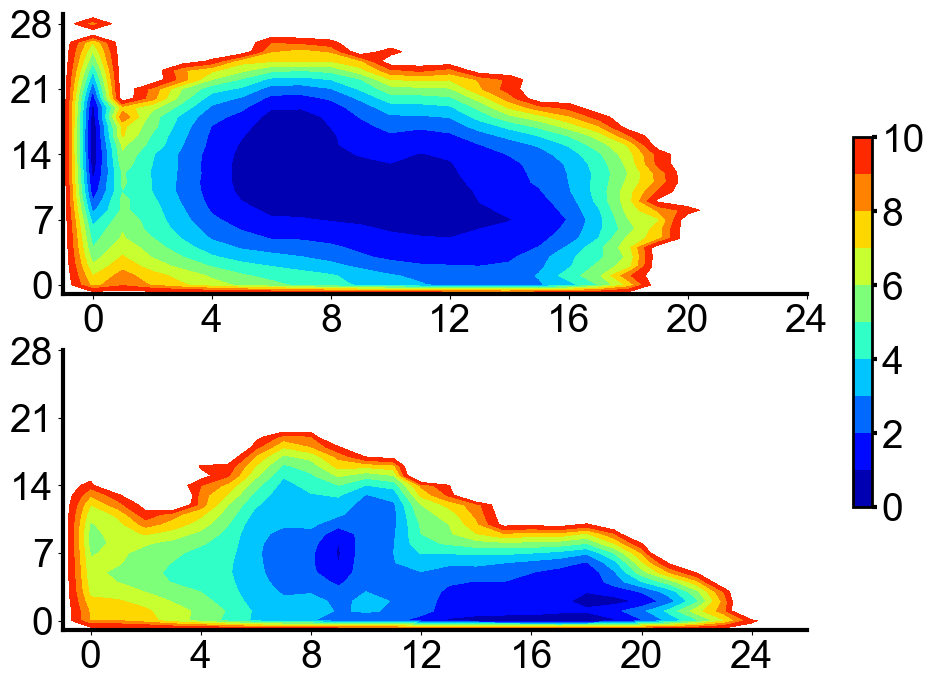

In [5]:
fig, axes = plt.subplots(figsize=(12,8),nrows=2, ncols=1)
pmf = []
pmf_raw = np.loadtxt('./IAPP/IAPP-fib-replica_mon/pmf2d_hb_inhb_300.dat')[:,2].reshape(21,29)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
pmf.append(pmf_raw)
pmf_raw = np.loadtxt('./abeta_selfseeding/morphology_a/pmf2d_hb_inhb_300.dat')[:,2].reshape(26,21)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
pmf.append(pmf_raw)

vmax = min([int(pmf_x.max())+1 for pmf_x in pmf])
pmf = [np.pad(pmf_x,(1,1),constant_values=vmax) for pmf_x in pmf]
levels = np.arange(vmax)
for i in range(2):
    x,y = pmf[i].shape
    print(pmf[i].max())
    inhb,hb = np.meshgrid(np.arange(-1,y-1),np.arange(-1,x-1))
    heatmap = axes[i].contourf(hb,inhb,pmf[i],cmap='jet',vmin=0,vmax=vmax,levels=levels)
    axes[i].set_xticks([0,4,8,12,16,20,24])
    axes[i].set_yticks([0,7,14,21,28])
    axes[i].spines[['right', 'top']].set_visible(False)
    for lb in axes[i].get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        #lb.set_fontweight('bold')
        lb.set_fontname(fontfamily)
    for lb in axes[i].get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily) 
    for spine in axes[i].spines.values():
        spine.set_linewidth(axiswidth)


cbar = plt.colorbar(heatmap,ax=axes, shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

## PMF of Interpeptide HB vs intra HB

[Text(1, 0.0, '0'),
 Text(1, 2.0, '2'),
 Text(1, 4.0, '4'),
 Text(1, 6.0, '6'),
 Text(1, 8.0, '8'),
 Text(1, 10.0, '10'),
 Text(1, 12.0, '12'),
 Text(1, 14.0, '14')]

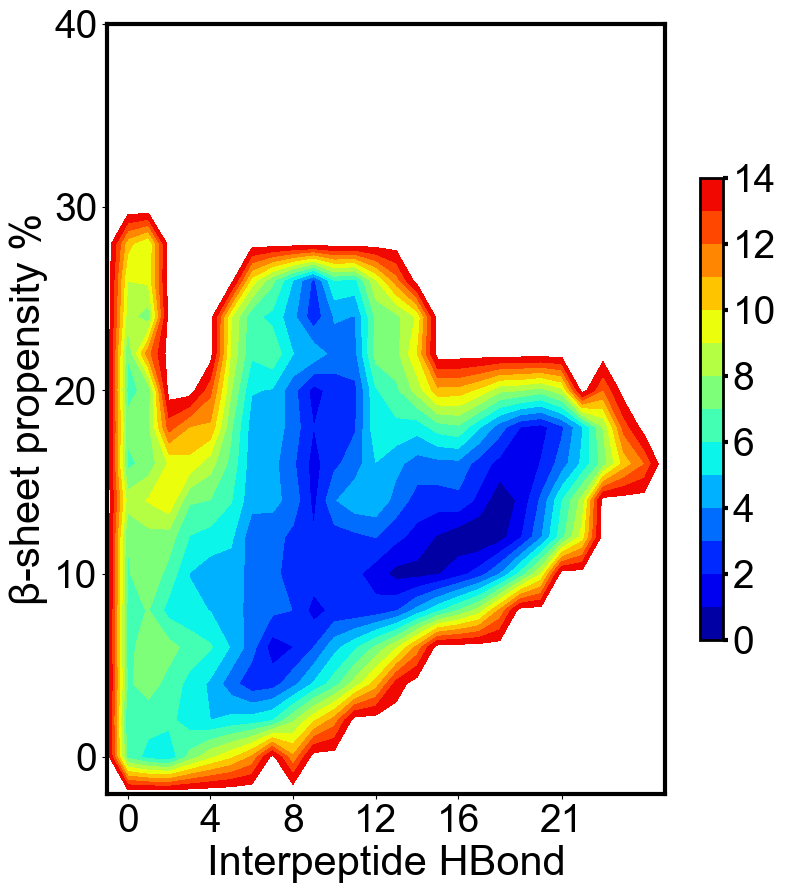

In [6]:
plt.figure(figsize=(9, 10))
ax = plt.axes()
pmf_raw = np.loadtxt('./abeta_selfseeding/morphology_a/pmf2d_hb_betasheet_300.dat')[:,2].reshape(26,15)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
vmax = int(pmf_raw.max())+1
pmf = np.pad(pmf_raw,(1,1),constant_values=vmax)

levels = np.arange(vmax)
beta,hb = np.meshgrid(np.arange(-1,16),np.arange(-1,27))

heatmap = plt.contourf(hb,beta,pmf,cmap='jet',vmin=0,vmax=vmax,levels=levels)

plt.xticks([0,4,8,12,16,21],fontsize=fontsize_tick,family=fontfamily)
plt.yticks([0,5,10,15,20],[0,10,20,30,40],fontsize=fontsize_tick,family=fontfamily)
plt.xlabel('Interpeptide HBond',fontsize=fontsize_label,family=fontfamily)
plt.ylabel('β-sheet propensity %',fontsize=fontsize_label,family=fontfamily)
for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

## Contact map

0.9903415442577036


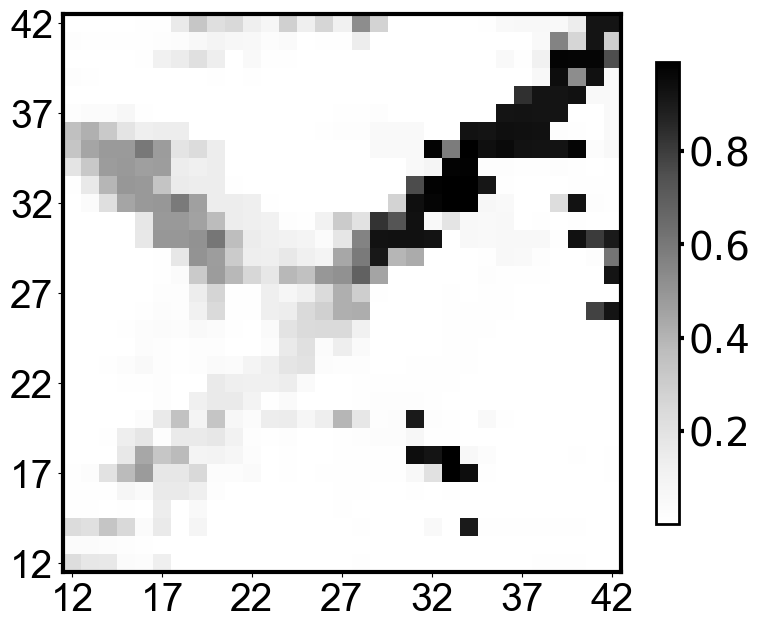

In [7]:
ctm = np.loadtxt('./abeta_selfseeding/morphology_a/RW_ctm_300.txt')[:,0].reshape(31,31)
vmax = ctm.max()
plt.figure(figsize=(9, 10))
ax = plt.axes()
map = plt.imshow(ctm,cmap='Greys',origin='lower')
ticks = np.arange(0,31,5)
plt.xticks(ticks,ticks+12)
plt.yticks(ticks,ticks+12)
print(vmax)
for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(map,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)


# Morphology B

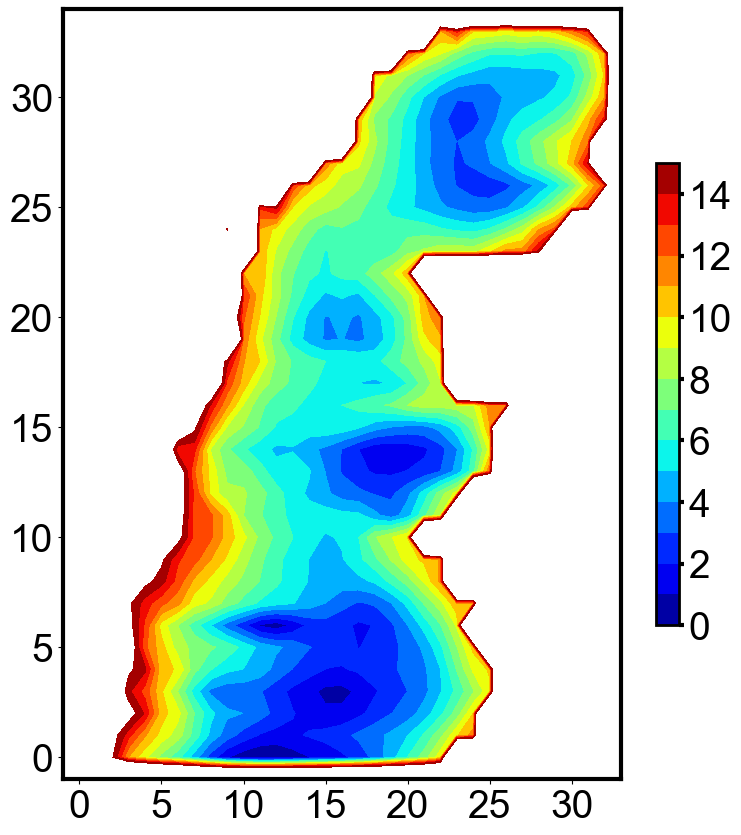

In [8]:
plt.figure(figsize=(9, 10))
ax = plt.axes()
pmf_raw = np.loadtxt('./abeta_selfseeding/morphology_b/pmf2d_hb_qvalue_300.dat')[:,2].reshape(33,34)
pmf_raw = (pmf_raw-pmf_raw.min())/0.596
pmf = np.pad(pmf_raw,(1,1),constant_values=32)
levels = np.arange(16)
qv,hb = np.meshgrid(np.arange(-1,35),np.arange(-1,34))
heatmap = plt.contourf(hb,qv,pmf,cmap='jet',levels=levels)

for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

cbar = plt.colorbar(heatmap,shrink=0.6)
cbar.ax.tick_params(labelsize=fontsize_tick,width=axiswidth)
for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticklabels(levels,fontname=fontfamily)

plt.savefig('./abeta_selfseeding/morphology_b/pmf_hb_vs_qvalue.png',dpi=220,transparent=True)

## Trj plot, hb&qvalue vs time

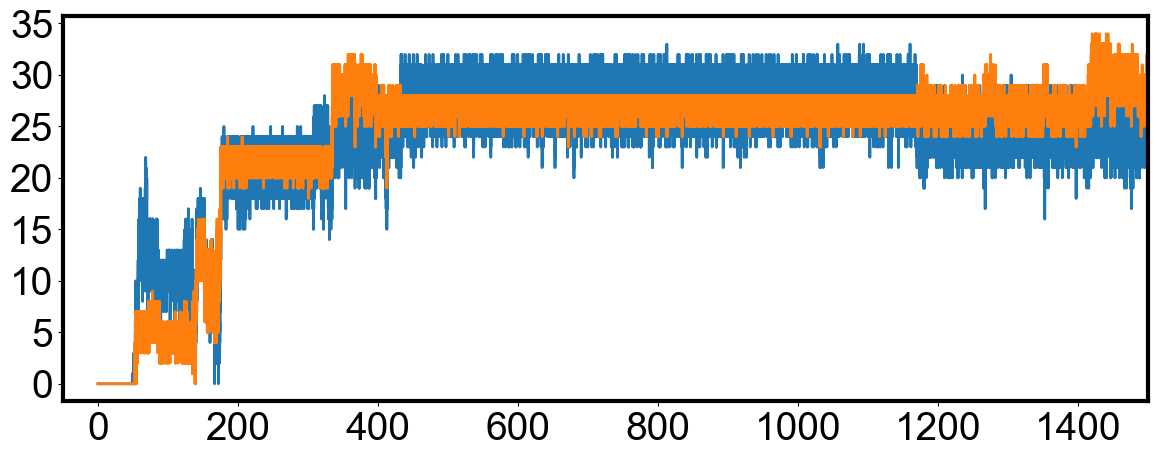

In [9]:
frame = 15
last_f = 1
hb = np.loadtxt(f'./morphology_b/time-evo-data/{frame}.hb')[:-last_f]
qv = np.loadtxt(f'./morphology_b/time-evo-data/{frame}.qvalue')[:-last_f]
plt.figure(figsize=(14, 5))
ax = plt.axes()

time = np.arange(len(hb))*0.005
plt.plot(time,hb,label='H-bond',linewidth=linewidth-1)
plt.plot(time,qv,label='Q-value',linewidth=linewidth-1)
plt.xlim(-50,1500)
for lb in ax.get_xticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily)
for lb in ax.get_yticklabels():
    lb.set_fontsize(fontsize_tick)
    #lb.set_fontweight('bold')
    lb.set_fontname(fontfamily) 
for spine in ax.spines.values():
    spine.set_linewidth(axiswidth)

plt.savefig('./abeta_selfseeding/morphology_b/traj_hb_qvalue_vs_time.png',dpi=220,transparent=True)